**Digit Classification with MNIST Dataset using ANN**

Submitted By: Anayna Singh


In [30]:
import numpy as np
import pandas as pd

In [31]:

import tensorflow as tf
tf.__version__

'2.8.0'

In [32]:
from tensorflow import keras #a deep learning library(used in deep learning)

In [33]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [34]:
print(x_train.shape)

(60000, 28, 28)


In [35]:
y_train.shape

(60000,)

In [36]:
x_test.shape

(10000, 28, 28)

In [37]:
y_test.shape

(10000,)

In [38]:
#assign labels for classification in mnist dataset
label = ['0 1 2 3 4 5 6 7 8 9']

In [39]:
type(label)

list

In [40]:
label = label[0].split()
label

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

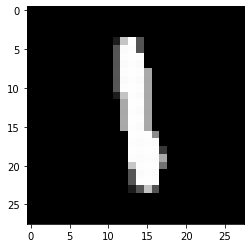

Output : 1


In [41]:
import matplotlib.pyplot as plt
a = 200
plt.imshow(x_train[a], cmap = 'gray')
plt.show()
print(f"Output : {label[y_train[a]]}") #prints which is the category displayed in the graph

In [42]:
x_train[0].shape  #28x28 pixels x_train[0] gives the brightness of the 784 pixels in that image

(28, 28)

In [43]:
x_train[0].max()

255

In [44]:
x_train[0].min()

0

In [45]:
#Normalization of the images
x_train = x_train/255
x_test = x_test/255

In [46]:
x_train.max()

1.0

In [47]:
x_test.max()

1.0

In [48]:
#Define the neural network architecture
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = x_train[0].shape)) #784 neurons in input layer #converts/flattens the 28*28 pixels into 784 pixels
model.add(tf.keras.layers.Dense(1400, activation='relu')) #any no of neiurons between 532 and 1568
model.add(tf.keras.layers.Dense(10,'softmax')) #10 neurons for the output layer(multiclass classification )(activation=softmax)


In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 1400)              1099000   
                                                                 
 dense_3 (Dense)             (None, 10)                14010     
                                                                 
Total params: 1,113,010
Trainable params: 1,113,010
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [51]:
model.fit(x_train, y_train, epochs = 40)
#Batch Size = 32, 1875 batches (total training data 60000)

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1800 - accuracy: 0.9463
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0742 - accuracy: 0.9764
Epoch 3/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0483 - accuracy: 0.9841
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0339 - accuracy: 0.9887
Epoch 5/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0259 - accuracy: 0.9916
Epoch 6/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0212 - accuracy: 0.9933
Epoch 7/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0197 - accuracy: 0.9933
Epoch 8/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0143 - accuracy: 0.9953
Epoch 9/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0148 - accuracy: 0.9952
Epoch 10/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.012

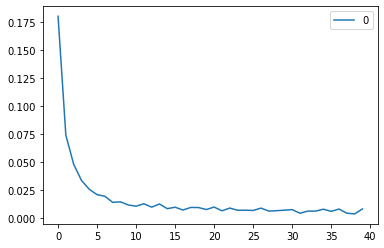

In [52]:
#to plot the decrease in loss
import pandas as pd
loss = pd.DataFrame(model.history.history['loss']).plot()


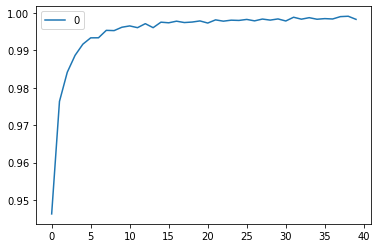

In [53]:
#to plot the increase in accuracy
acc = pd.DataFrame(model.history.history['accuracy']).plot()

In [54]:
#to evaluate on test data
import numpy as np
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis = 1) #to get proper classes (in terms of 0, 1, 2, 3, 4)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [55]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [56]:
from sklearn.metrics import accuracy_score #model accuracy/testing accuracy
accuracy_score(y_test, y_pred)

0.9823

In [57]:
model.save('mnist.hdf5') #to save weights(trainable parameters) of the neural networks trained model for the digit c;lassification mnist
#saves this model as a file which can be used elsewhere
#Hierarchical Data Format 5(.hdf5)